In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')

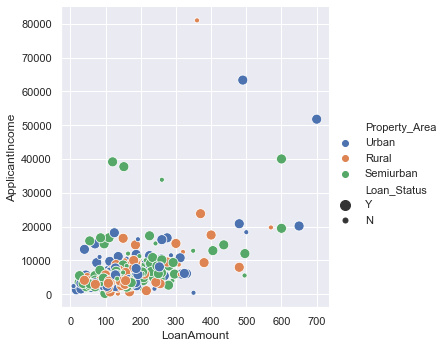

In [2]:
# relplot - scatter
sns.set(style="darkgrid")
sns.relplot(x="LoanAmount", y="ApplicantIncome", hue="Property_Area", size="Loan_Status",sizes =(25,100) , data=loan)
#style=""

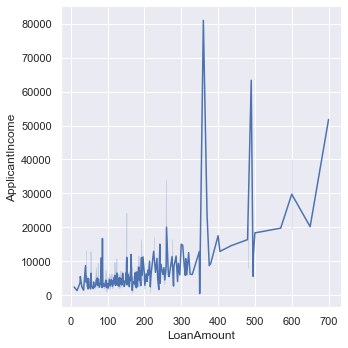

In [6]:
#relplot - line
x_data = loan["LoanAmount"].index
palette = sns.cubehelix_palette(light=.8, n_colors=3)
sns.relplot(x="LoanAmount", y="ApplicantIncome", kind="line", palette = palette, data=loan)
# hue="Property_Area", style="Loan_Status"

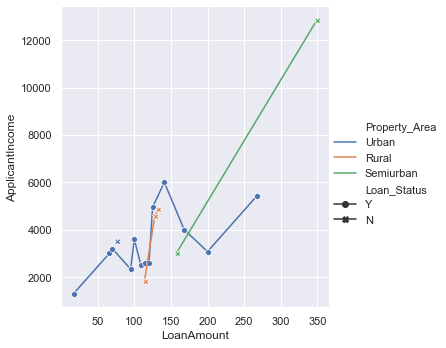

In [8]:
#replot - line with semantics
x_data_20 = loan['LoanAmount'][:20].index
sns.relplot(x="LoanAmount", y="ApplicantIncome", hue="Property_Area", style="Loan_Status", kind="line", dashes=False, markers=True, data=loan[:20])
#estimator,ci,size

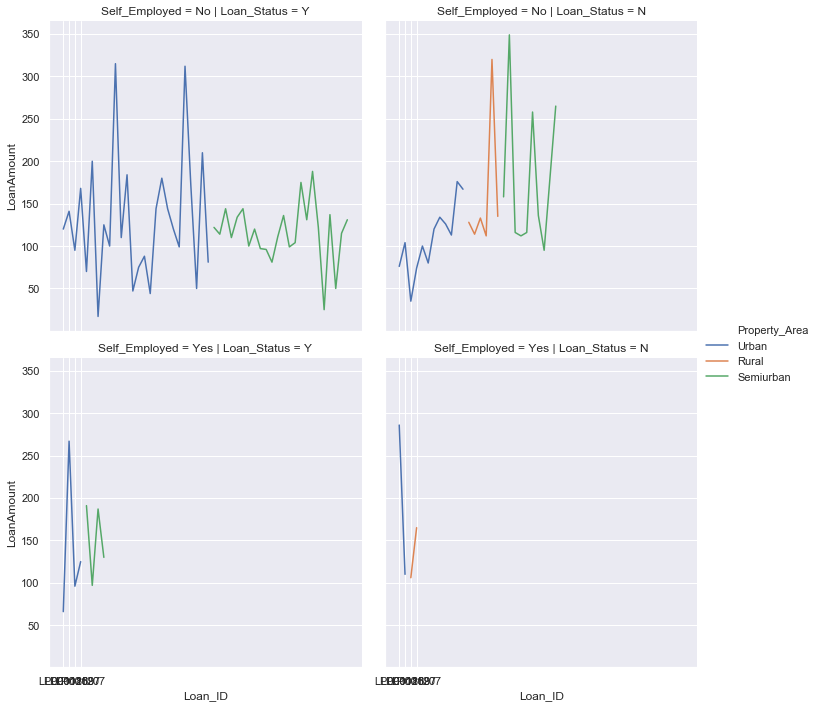

In [54]:
#multiple relationships with facets
sns.relplot(x="Loan_ID", y="LoanAmount", hue="Property_Area", col="Loan_Status",row="Self_Employed", kind="line", data =loan[:100])
#col_wrap=5,height=3, aspect=.75, linewidth=2.5,

Self_Employed
No     5049.748000
Yes    7380.817073
Name: ApplicantIncome, dtype: float64

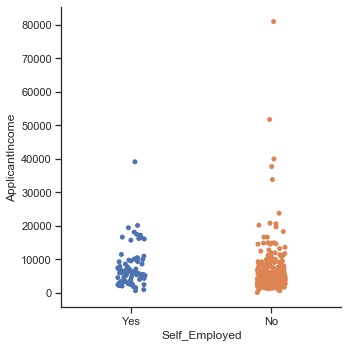

In [38]:
#Categorical scatterplot - strip plot
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Self_Employed", y="ApplicantIncome", order=["Yes", "No"], data=loan)
#jitter=False
#swap categorcial variable to y for horizontal plot

loan.groupby(by=loan['Self_Employed'])["ApplicantIncome"].mean()

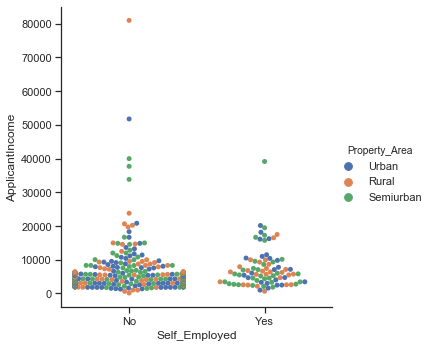

In [61]:
#Categorical scatterplot - swarm plot - adjusts the points along the categorical axis
sns.catplot(x="Self_Employed", y="ApplicantIncome", hue="Property_Area", kind='swarm', data=loan)

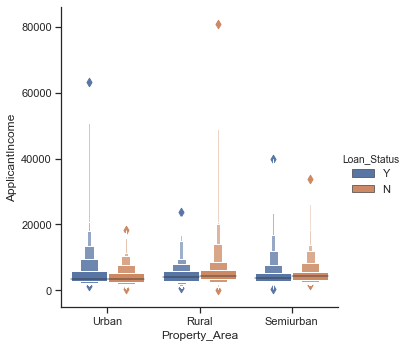

In [72]:
#Categorical - distribution of data - box plot, boxen plot
sns.catplot(x="Property_Area", y="ApplicantIncome", hue="Loan_Status", kind="boxen", data=loan)
#hue - the box for each level of the semantic variable is moved along the categorical axis
#dodge=False
#kind=boxen - showing more information about the shape of the distribution.Best suited for larger datasets


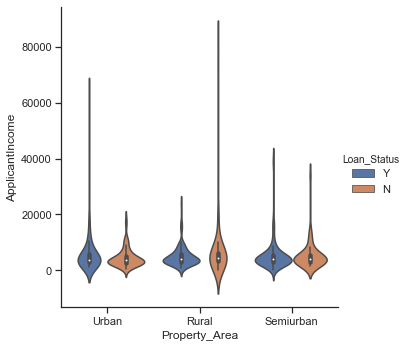

In [75]:
#Categorical - distribution of data -violin plot 
#combines a boxplot with the kernel density estimation
sns.catplot(x="Property_Area", y="ApplicantIncome", hue="Loan_Status", kind="violin", data=loan)
#bw=.15, cut=0
#split=True - split the violins when the hue parameter has only "two levels"
#inner="stick" - show each individual observation instead of the summary boxplot 
#inner="quartile" - show quartiles only 

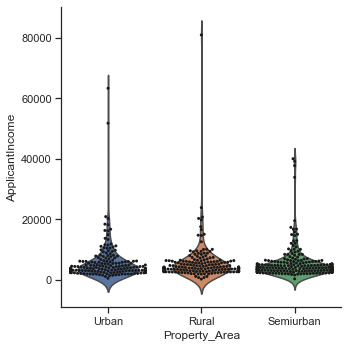

In [88]:
#Combine swarmplot() or striplot() with a box plot or violin plot
g = sns.catplot(x="Property_Area", y="ApplicantIncome", kind="violin", inner=None, data=loan)
sns.swarmplot(x="Property_Area", y="ApplicantIncome", color="k", size=3, data=loan, ax=g.ax)

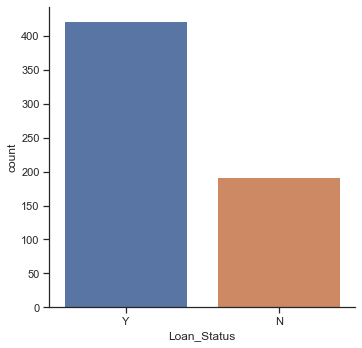

In [131]:
#Statistical estimation within categories - bar plot, count plot
#error bars - uses bootstrapping to compute a confidence interval around the estimate
#kind="count" - show the number of observations in each category
sns.catplot("Loan_Status", kind="count", data=loan)

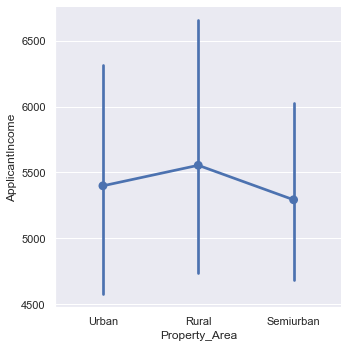

In [4]:
#Statistical estimation within categories - pointplot
sns.catplot(y="ApplicantIncome", x="Property_Area", kind="point", data=loan)
# rather than showing a full bar, it plots the point estimate and confidence interval
#connects points from the same hue category

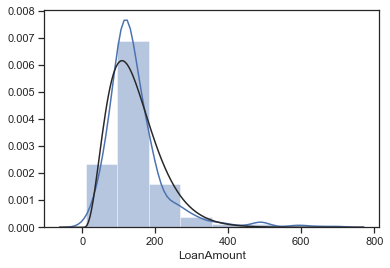

In [151]:
#Plotting univariate distributions
from scipy import stats
sns.distplot(loan.LoanAmount, fit=stats.gamma, bins=8)

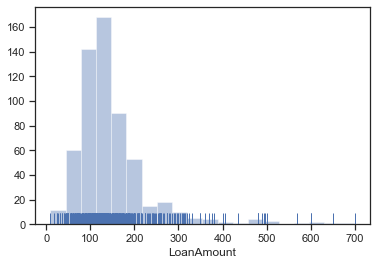

In [146]:
#Plotting univariate distributions - histogram
sns.distplot(loan.LoanAmount, bins=20, kde=False, rug=True);
#rug plot - small vertical tick at each observation
#hist=False - kde plot
#KDE plots encode the density of observations on one axis with height along the other axis

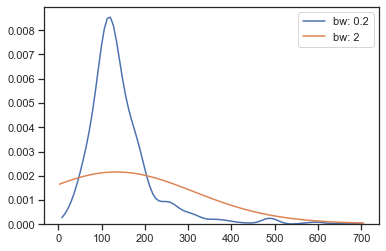

In [123]:
#KDE plot
sns.kdeplot(loan.LoanAmount,bw=.2, label="bw: 0.2")
sns.kdeplot(loan.LoanAmount, bw=2, label="bw: 2")
#bw - controls how tightly the estimation is fit to the data, much like the bin size in a histogram

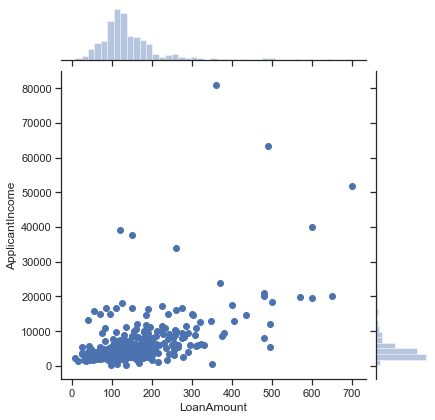

In [126]:
#Bivariate distribution - Joint Plot - scatter
sns.jointplot(x ='LoanAmount', y = 'ApplicantIncome', data =loan)
#kind="hex" - hexbin plot - it shows the counts of observations that fall within hexagonal bins
#kind= "kde" - kernel density estimation - contour plot 
#Built on top of JointGrid

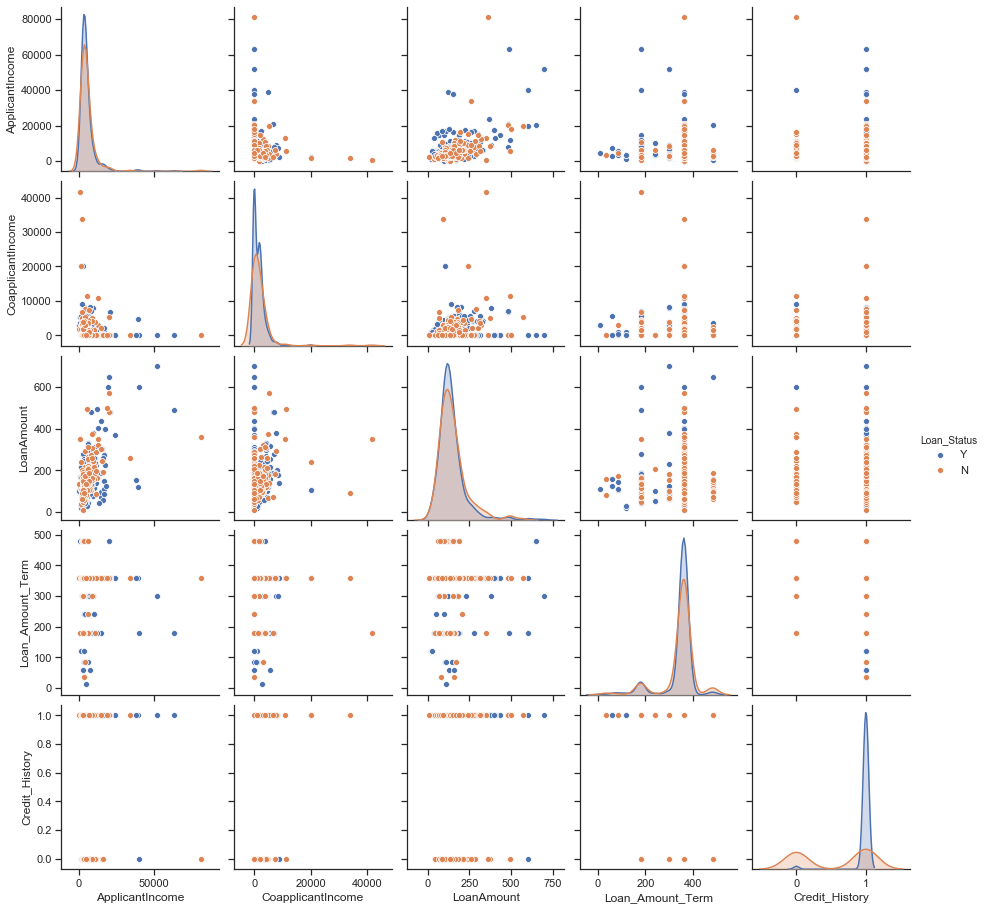

In [129]:
#Bivariate distribution - Pairplot
sns.pairplot(data=loan, hue="Loan_Status")
#it also draws the univariate distribution of each variable on the diagonal axes
#hue="" parameter automatically changes the histograms to KDE plots
#built on top of a PairGrid

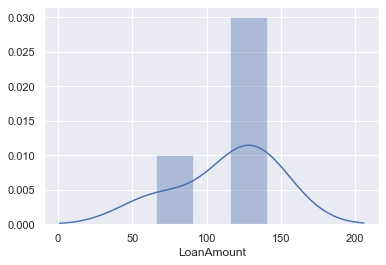

In [164]:
import statsmodels.nonparametric.api as smnp
loan5 = loan[:5]
sns.set(style='darkgrid')
kwargs = {'cumulative': True}
sns.distplot(loan5.LoanAmount)

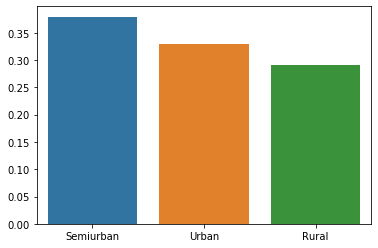

In [6]:
probabilities = loan['Property_Area'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

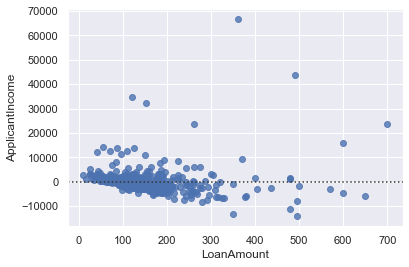

In [9]:
#Reg Plot
sns.residplot(x="LoanAmount", y="ApplicantIncome", data=loan)

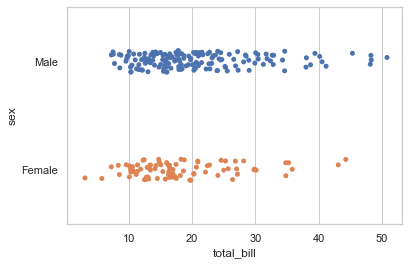

In [41]:

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.stripplot(x="total_bill", y ="sex", data =tips)

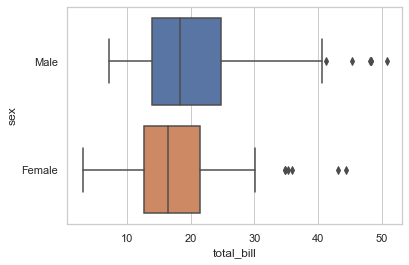

In [42]:
sns.boxplot(x="total_bill", y ="sex", data =tips)